In [20]:
!nrnivmodl ../mechanisms

/home/anil/git-repos/BlueCelluLab/examples/1-singlecell
Mod files: "../mechanisms/../mechanisms/CaDynamics_DC0.mod" "../mechanisms/../mechanisms/CaDynamics_E2.mod" "../mechanisms/../mechanisms/Ca_HVA2.mod" "../mechanisms/../mechanisms/Ca_HVA.mod" "../mechanisms/../mechanisms/Ca_LVAst.mod" "../mechanisms/../mechanisms/Ca.mod" "../mechanisms/../mechanisms/DetAMPANMDA.mod" "../mechanisms/../mechanisms/DetGABAAB.mod" "../mechanisms/../mechanisms/gap.mod" "../mechanisms/../mechanisms/GluSynapse.mod" "../mechanisms/../mechanisms/Ih.mod" "../mechanisms/../mechanisms/Im.mod" "../mechanisms/../mechanisms/KdShu2007.mod" "../mechanisms/../mechanisms/K_Pst.mod" "../mechanisms/../mechanisms/K_Tst.mod" "../mechanisms/../mechanisms/Nap_Et2.mod" "../mechanisms/../mechanisms/NaTa_t.mod" "../mechanisms/../mechanisms/NaTg.mod" "../mechanisms/../mechanisms/NaTs2_t.mod" "../mechanisms/../mechanisms/netstim_inhpoisson.mod" "../mechanisms/../mechanisms/ProbAMPANMDA_EMS.mod" "../mechanisms/../mechanisms/ProbG

In [21]:
from pathlib import Path
from bluecellulab import Cell
from bluecellulab.circuit.circuit_access import EmodelProperties

In [22]:
hoc_file = Path("hoc") / "cADpyr_L2TPC.hoc"
morph_file = Path("morphology") / "rr110330_C3_idA.asc"

In [23]:
emodel_properties = EmodelProperties(threshold_current=0.03203125,
                                     holding_current=-0.11,
                                     ais_scaler=1.11)
cell = Cell(hoc_file, morph_file, template_format="v6_ais_scaler", emodel_properties=emodel_properties)

In [24]:
from bluecellulab.analysis import BPAP

In [26]:
bpap = BPAP(cell)

In [27]:
bpap.run(duration=1500, amplitude=3)

In [28]:
voltage_attenuation = bpap.voltage_attenuation()

In [29]:
peak_delays = bpap.peak_delays()

{'cADpyr_L2TPC_bluecellulab_x[0].soma[0]': 0.0,
 'cADpyr_L2TPC_bluecellulab_x[0].dend[0]': 49.71862541728127,
 'cADpyr_L2TPC_bluecellulab_x[0].dend[1]': 214.030075900127,
 'cADpyr_L2TPC_bluecellulab_x[0].dend[2]': 289.6868866568043,
 'cADpyr_L2TPC_bluecellulab_x[0].dend[3]': 291.7305213348859,
 'cADpyr_L2TPC_bluecellulab_x[0].dend[4]': 225.18325353696943,
 'cADpyr_L2TPC_bluecellulab_x[0].dend[5]': 290.27985273767433,
 'cADpyr_L2TPC_bluecellulab_x[0].dend[6]': 292.2374928039293,
 'cADpyr_L2TPC_bluecellulab_x[0].dend[7]': 167.03477889825726,
 'cADpyr_L2TPC_bluecellulab_x[0].dend[8]': 278.256457557407,
 'cADpyr_L2TPC_bluecellulab_x[0].dend[9]': 235.8025659732236,
 'cADpyr_L2TPC_bluecellulab_x[0].dend[10]': 315.89994110855093,
 'cADpyr_L2TPC_bluecellulab_x[0].dend[11]': 254.57221852179686,
 'cADpyr_L2TPC_bluecellulab_x[0].dend[12]': 261.338979885372,
 'cADpyr_L2TPC_bluecellulab_x[0].dend[13]': 266.0999357007645,
 'cADpyr_L2TPC_bluecellulab_x[0].dend[14]': 323.6480876742596,
 'cADpyr_L2TPC_

In [30]:
all_recordings = bpap.cell.get_allsections_voltagerecordings()

In [31]:
soma_key = [key for key in all_recordings.keys() if key.endswith("soma[0]")][0]

In [32]:
soma_key

'cADpyr_L2TPC_bluecellulab_x[0].soma[0]'

In [33]:
all_recordings.keys()

dict_keys(['cADpyr_L2TPC_bluecellulab_x[0].soma[0]', 'cADpyr_L2TPC_bluecellulab_x[0].dend[0]', 'cADpyr_L2TPC_bluecellulab_x[0].dend[1]', 'cADpyr_L2TPC_bluecellulab_x[0].dend[2]', 'cADpyr_L2TPC_bluecellulab_x[0].dend[3]', 'cADpyr_L2TPC_bluecellulab_x[0].dend[4]', 'cADpyr_L2TPC_bluecellulab_x[0].dend[5]', 'cADpyr_L2TPC_bluecellulab_x[0].dend[6]', 'cADpyr_L2TPC_bluecellulab_x[0].dend[7]', 'cADpyr_L2TPC_bluecellulab_x[0].dend[8]', 'cADpyr_L2TPC_bluecellulab_x[0].dend[9]', 'cADpyr_L2TPC_bluecellulab_x[0].dend[10]', 'cADpyr_L2TPC_bluecellulab_x[0].dend[11]', 'cADpyr_L2TPC_bluecellulab_x[0].dend[12]', 'cADpyr_L2TPC_bluecellulab_x[0].dend[13]', 'cADpyr_L2TPC_bluecellulab_x[0].dend[14]', 'cADpyr_L2TPC_bluecellulab_x[0].dend[15]', 'cADpyr_L2TPC_bluecellulab_x[0].dend[16]', 'cADpyr_L2TPC_bluecellulab_x[0].dend[17]', 'cADpyr_L2TPC_bluecellulab_x[0].dend[18]', 'cADpyr_L2TPC_bluecellulab_x[0].dend[19]', 'cADpyr_L2TPC_bluecellulab_x[0].dend[20]', 'cADpyr_L2TPC_bluecellulab_x[0].dend[21]', 'cADpyr_L2T

In [34]:
time = cell.get_time()
soma_voltage = all_recordings[soma_key]


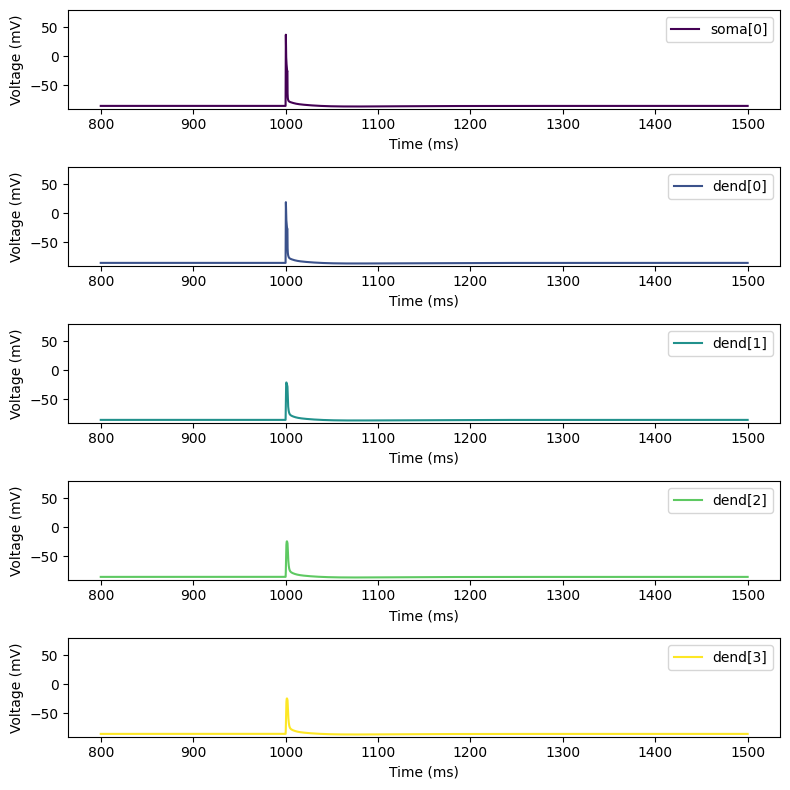

In [35]:
from matplotlib.pyplot import get_cmap
import matplotlib.pyplot as plt

# Define the figure size
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 8))

subtree = list(all_recordings.keys())[:5]
# Define colormap
color_map = get_cmap('viridis', len(subtree))

# plot the voltage recordings from the subtree
for i, (ax, section) in enumerate(zip(axes, subtree)):
    voltage = all_recordings[section]
    ax.plot(time[32000:], voltage[32000:], label=section.split(".")[-1], color=color_map(i))
    ax.legend(loc="upper right")
    ax.set_xlabel("Time (ms)")
    ax.set_ylabel("Voltage (mV)")
    ax.set_ylim(-90, 80)  # Set y-axis limits

plt.tight_layout()  # This ensures that the plots don't overlap
plt.show()
